# Import libraries

In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [2]:
pynf.__version__

'5.6.0'

In [3]:
# Define the present path as root path
root_path = os.getcwd()
print(root_path)

path = root_path+'/res_1gauss_bg'
print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_1gauss_bg


# Run the code in a specific directory

In [4]:
# Go to a define analysis
os.chdir(path)

In [5]:
ls

he-histo.dat                       nf_output_fit_median.dat
nf_dead_points_information.txt     nf_output_initial_live_points.dat
nf_input.yaml                      nf_output_last_live_points.dat
nf_loglast.log                     nf_output_n_likelihood_calls.txt
nf_output_data_max.dat             nf_output_points.paramnames
nf_output_data_mean.dat            nf_output_points.ranges
nf_output_data_median.dat          nf_output_points.txt
nf_output_diag.dat                 nf_output_res.dat
nf_output_fit_max.dat              nf_output_res.json
nf_output_fit_mean.dat


### Example of use of internal or already defined internal function

In [6]:
#### Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

### Example of latex function (change from markdown to a code input and run it)

#### Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1)^2/(2s^2)} + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

### Example of legacy function use from USERFCN.f (change from markdown to a code input and run it)

#### Define inputs using a "legacy" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=['GAUSS_BG'],
    params={                    # Function expression from legacy
        'b_g': {'value': 0.01,  'step': -1, 'min': 0, 'max': 0.3 ,   'npar': 1},
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 2},
        'A_1': {'value': 300,   'step': -1, 'min': 0, 'max': 500 ,   'npar': 3},
        's':   {'value': 20,    'step': -1, 'min': 10, 'max': 30 ,   'npar': 4}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=1,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [7]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='live')

# For visualising the progress graphycally (not working in Google Colab), use
# out = conf.sample(output_mode='full')

# If nothing shows, use simply the command (symlink to created or version to be used)
# Create the command to run nested fit in case of need
# run_nested_fit = os.system('nested_fit'+pynf.__version__)
# run_nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_g
Infix expression: GAUSS_IF(x,x1,A1,s)+bg
      Parameters: A_1, b_g, s, x_1
| N. try:  1 | N. step:        100 | Min. loglike:   -1510.327455232193643 | Evidence:   -1517.902462149577786 | Ev. step:   -1517.927318458956279 | Ev. pres. acc.:  1.1801360E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1318.608829388350387 | Evidence:   -1324.697413673617120 | Ev. step:   -1325.880169363915684 | Ev. pres. acc.:  9.8683095E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1209.481748889566688 | Evidence:   -1218.582546967655162 | Ev. step:   -1219.260913681391230 | Ev. pres. acc.:  8.8061608E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1139.906493950877348 | Evidence:   -1147.516189811268077 | Ev. step:   -1148.403022119821344 | Ev. pres. acc.:  8.

# Visualize the results

In [8]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['A_1', 'x_1', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g']


0 max
nf_output_data_max.dat


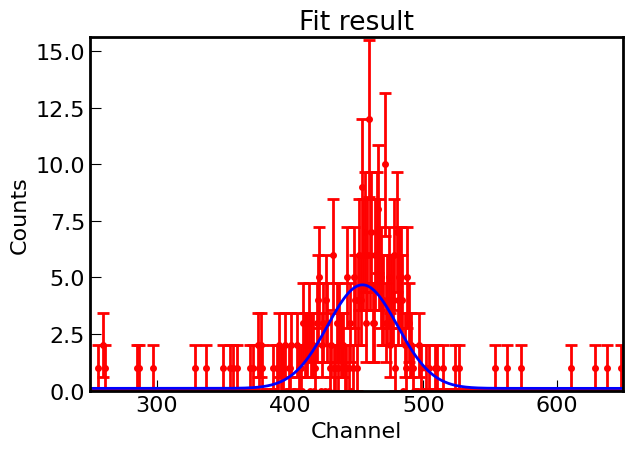

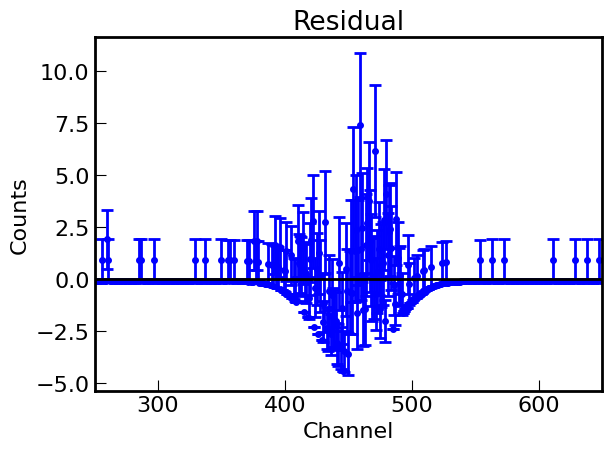

In [9]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

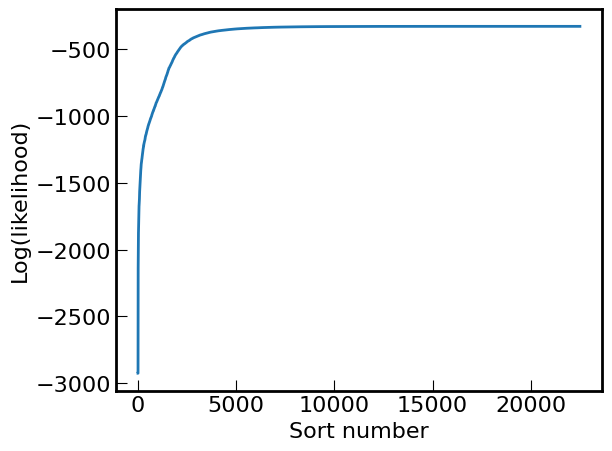

In [10]:
# Plot the likelihood sampling 
an.plot_like()

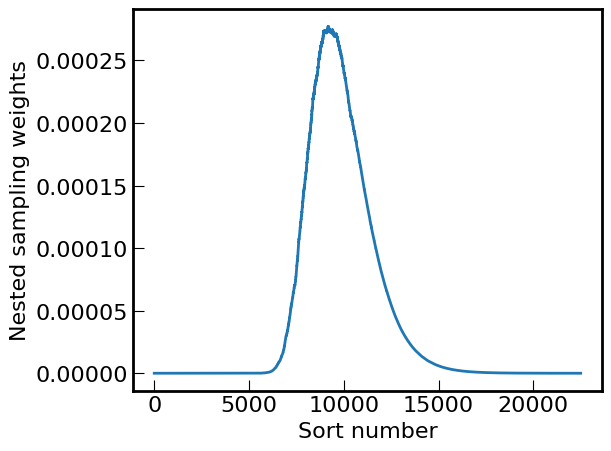

In [11]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

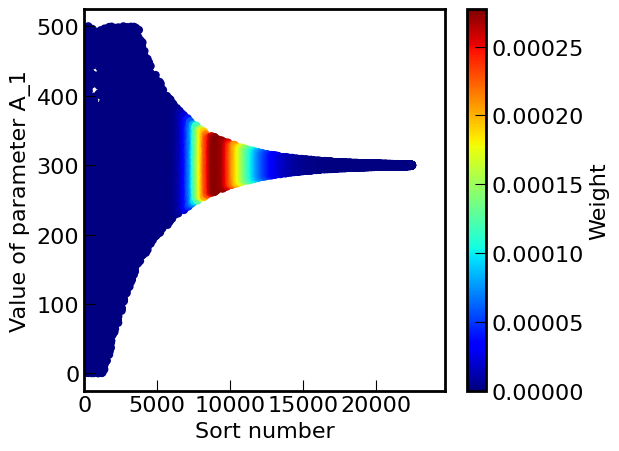

In [12]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

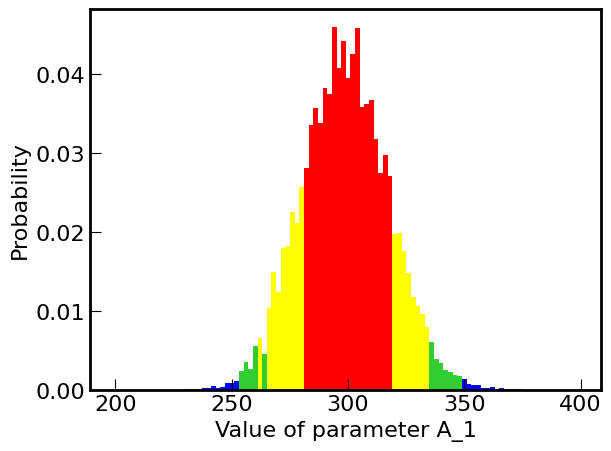

In [13]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=200,xmax=400)

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 22 out of 22502 samples have logL <= logL_birth,
22 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


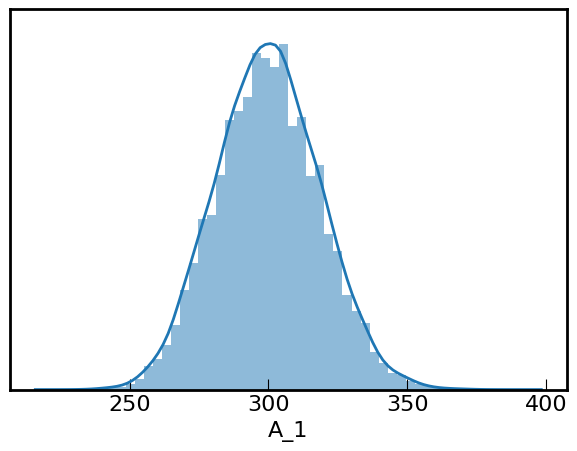

In [14]:
# Plot one parameter interpolated histogram using getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo_interp('A_1')

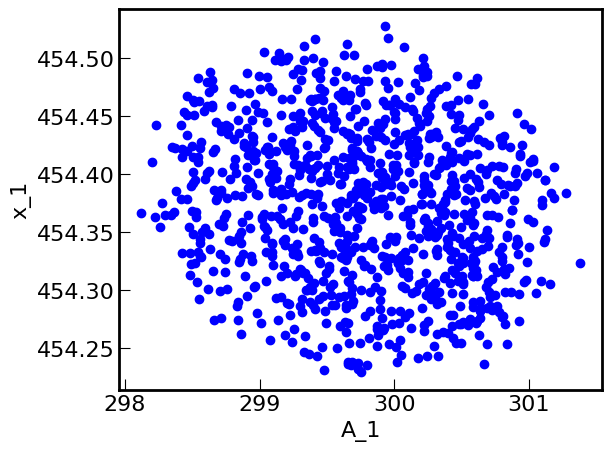

In [15]:
an.plot_live('A_1','x_1')

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1152: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1153: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1154: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1155: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

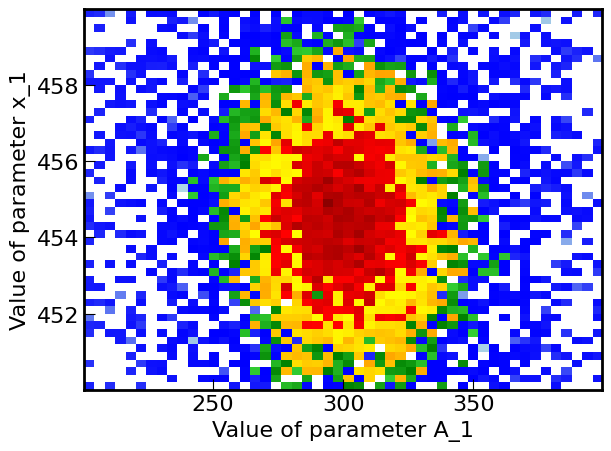

In [16]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=50,xmin=200,xmax=400,ymin=450,ymax=460)

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 22 out of 22502 samples have logL <= logL_birth,
22 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


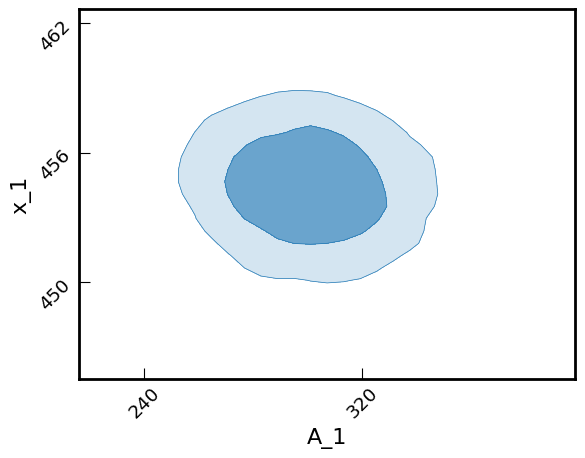

In [17]:
# Same with interpolation from getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo2D_interp('A_1','x_1')


/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 22 out of 22502 samples have logL <= logL_birth,
22 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


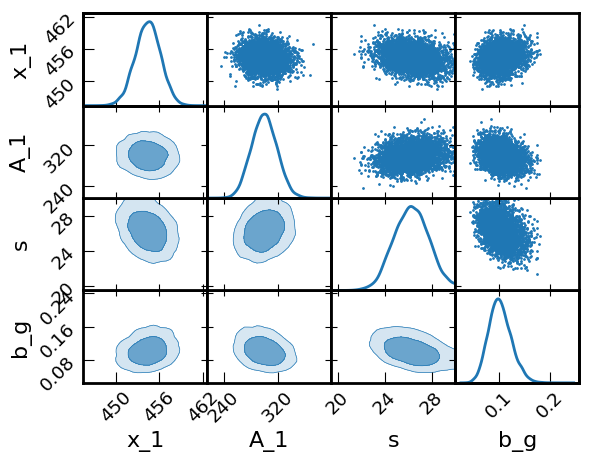

In [18]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

# Extract important data and post-processing
The results can be extracted by the output of the python function: `out = conf.sample()`
Alternatively, another function can be used to read the output ASCII files (`output = an.read_output()`) or the `.json` finles

### Using the python function output

In [19]:
# Extract the raw information of evidence
out[ 'evidence']

{'stddev': 0.0,
 'uncertainty': 0.08954227227453351,
 'value': -338.2184881571001}

In [20]:
# Specific information of output parameters
par_name = 'x_1'
print(par_name, ' = ', out['params'][par_name][ 'mean'],' ± ', out['params'][par_name][ 'std'])

x_1  =  454.433688631058  ±  1.7342360910619945


In [21]:
# Miscelaneous information
out['meta']

{'bayes_complexity': 3.9423287639323235,
 'information': 8.017818524086692,
 'minimal_req_it': 3034,
 'ncores': 10,
 'timereal': 5.782532999990508,
 'timetotal': 14.181484}

### Using the built in function 'read_output'

In [22]:
# Read the output files in a dictionnary
out = an.read_output()

# Print some results

# The evidence
print('Evidence = ', out['evidence'],'±',out['evidence_err_est'])

# The Bayesian complexity
print('Complexity = ', out['complexity'])

# Some parameter
par_name = 'x_1'
par_index = out['par_name'].index('x_1')
print(par_name, ' = ', out['mean'][par_index],' ± ', out['sd'][par_index])

Evidence =  -338.2184881571001 ± 0.08954227227453351
Complexity =  3.9423287639323235
x_1  =  454.433688631058  ±  1.7342360910619945


In [23]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 22 out of 22502 samples have logL <= logL_birth,
22 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


logZ 	 = -338.203694 	± 0.085335
D_KL 	 = 8.002494 	± 0.078433
logL_P 	 = -330.201200 	± 0.033612
d_G 	 = 3.749945 	± 0.093339


# Combine latex functions with library functions

## Two Gaussian plus background

In [24]:
# Define a directory 
path = root_path+'/res_2gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_2gauss_bg


### Run the code

In [25]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'double_gauss_bg(x, x_1, x_2, A_1, A_2, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=True,              # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [26]:
# Run the code

out = conf.sample(output_mode='none')

### Visualize the results 

In [27]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g']


0 max
nf_output_data_max.dat


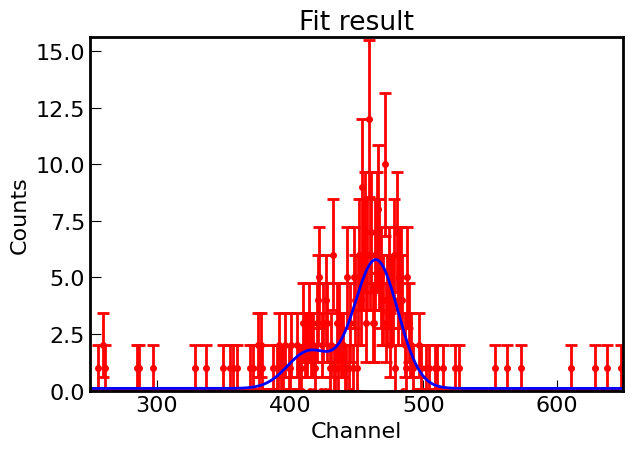

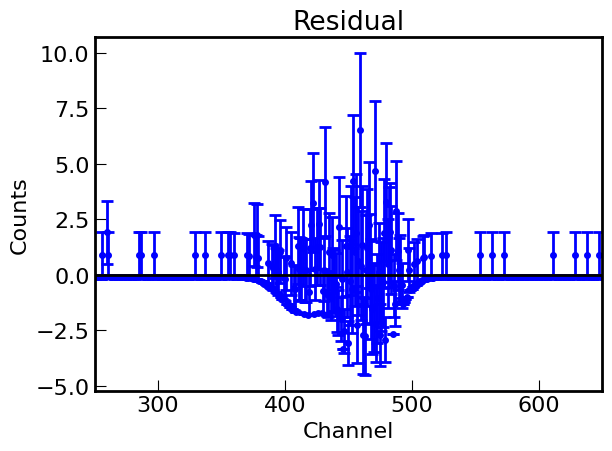

In [28]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

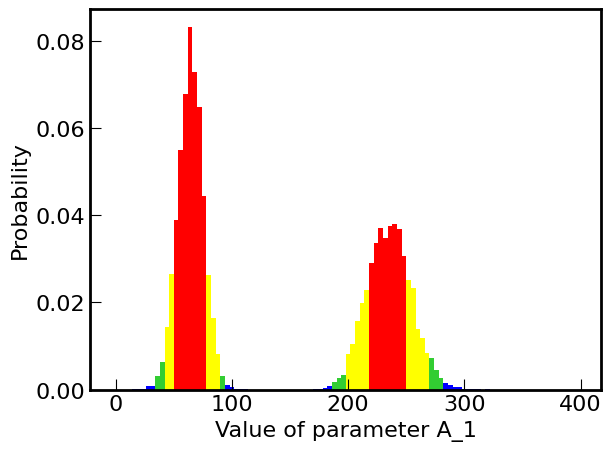

In [29]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1152: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1153: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1154: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1155: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

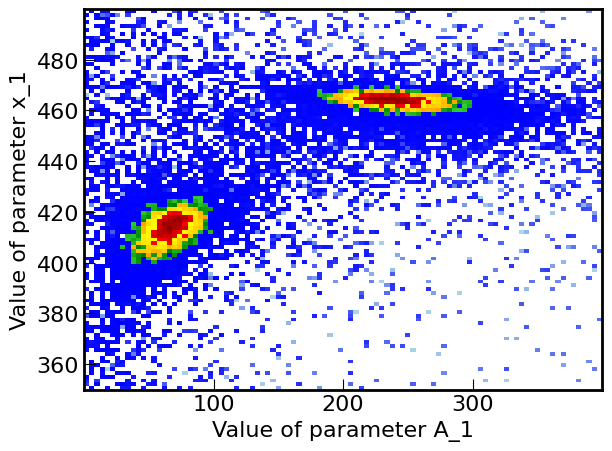

In [30]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 26 out of 29140 samples have logL <= logL_birth,
26 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


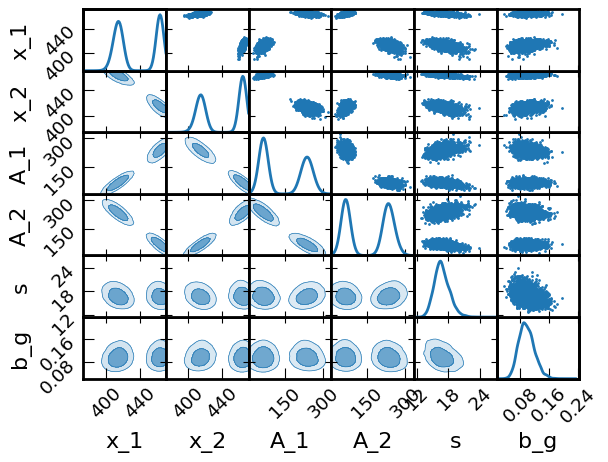

In [31]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [32]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 26 out of 29140 samples have logL <= logL_birth,
26 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


logZ 	 = -324.508152 	± 0.122119
D_KL 	 = 13.496973 	± 0.107526
logL_P 	 = -311.011179 	± 0.043897
d_G 	 = 6.627868 	± 0.188091


## Three Gaussian plus background

In [33]:
# Define a directory 
path = root_path+'/res_3gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_3gauss_bg


### Run the code

In [34]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'triple_gauss_bg(x, x_1, x_2, x_3, A_1, A_2, A_3, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_3, A_3, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_3': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=True,             # clustering recognition on/off
     cluster_method='g',             # method used
     cluster_parameter1=0.5,         # method parameter 1 (if needed)
     cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [35]:
# Run the code

out = conf.sample(output_mode='none')

### Visualize the results 

In [36]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's',
       'b_g'],
      dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's', 'b_g']


0 max
nf_output_data_max.dat


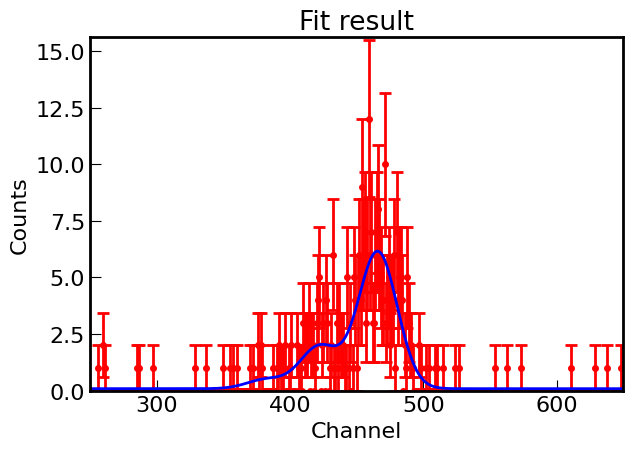

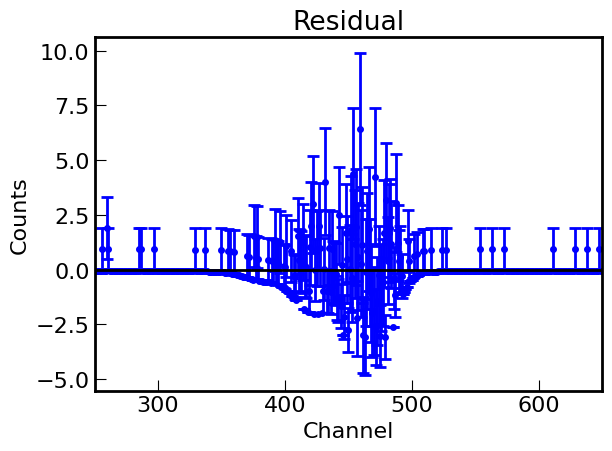

In [37]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

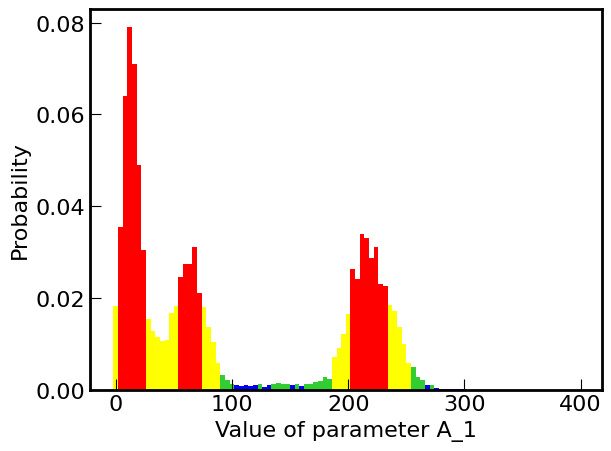

In [38]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1152: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1153: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1154: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1155: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

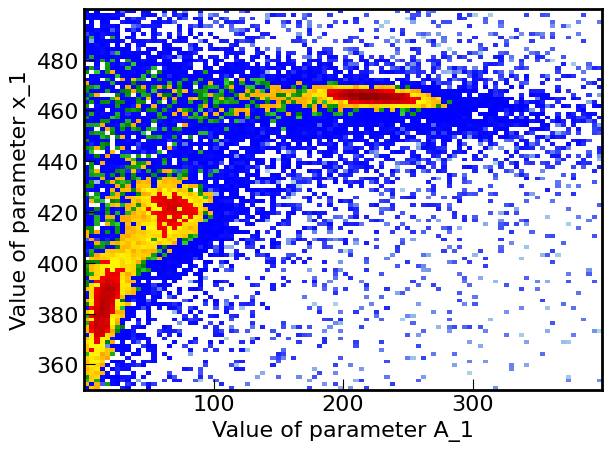

In [39]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 41 out of 34341 samples have logL <= logL_birth,
41 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


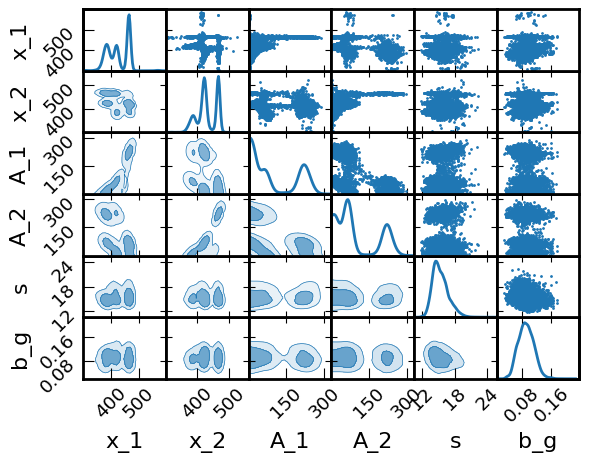

In [40]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [41]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 41 out of 34341 samples have logL <= logL_birth,
41 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


logZ 	 = -324.772460 	± 0.126560
D_KL 	 = 16.776515 	± 0.120909
logL_P 	 = -307.995946 	± 0.060894
d_G 	 = 13.135839 	± 0.253076


In [42]:
ls

he-histo.dat
nf_dead_points_information.txt
nf_input.yaml
nf_loglast.log
nf_output_cluster_final_20260120_100425.dat
nf_output_cluster_final_20260120_100429.dat
nf_output_cluster_max.dat
nf_output_cluster_mean_std.dat
nf_output_data_max.dat
nf_output_data_mean.dat
nf_output_data_median.dat
nf_output_diag.dat
nf_output_fit_max.dat
nf_output_fit_mean.dat
nf_output_fit_median.dat
nf_output_initial_live_points.dat
nf_output_last_live_points.dat
nf_output_meanshift_check.dat
nf_output_n_likelihood_calls.txt
nf_output_points.paramnames
nf_output_points.ranges
nf_output_points.txt
nf_output_res.dat
nf_output_res.json


Taking the last available file
Showing file  nf_output_cluster_final_20260120_100429.dat
Number of clusters: 7


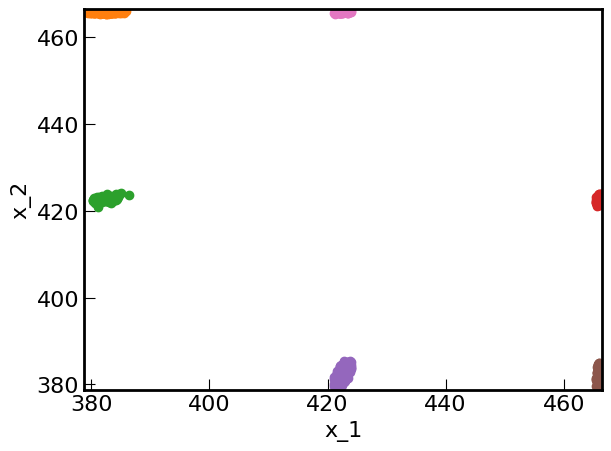

In [43]:
# If a cluster analysis have been done, visualize the clusters
## in 2D
an.plot_clusters('x_1','x_2')

Taking the last available file
Showing file  nf_output_cluster_final_20260120_100429.dat
Number of clusters: 7


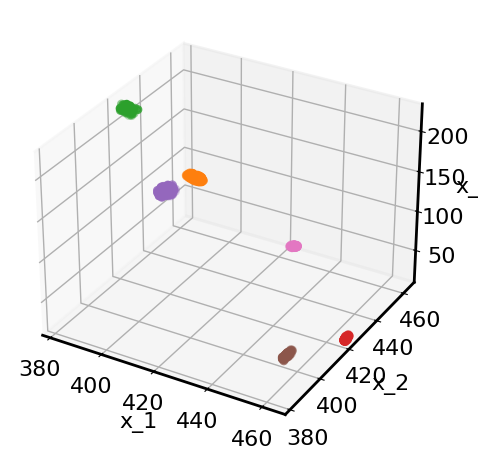

In [44]:
## and in 3D
an.plot_clusters3D('x_1','x_2','x_3')

## Four Gaussian plus background

In [45]:
# Define a directory 
path = root_path+'/res_4gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_4gauss_bg


### Run the code

In [46]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'four_gauss_bg(x, x_1, x_2, x_3, x_4, A_1, A_2, A_3, A_4, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_3, A_3, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_4, A_4, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_4': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_3': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_4': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=True,              # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [47]:
# Run the code

out = conf.sample(output_mode='none')

### Visualize the results 

In [48]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2',
       'A_3', 'A_4', 's', 'b_g'],
      dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's', 'b_g']


0 max
nf_output_data_max.dat


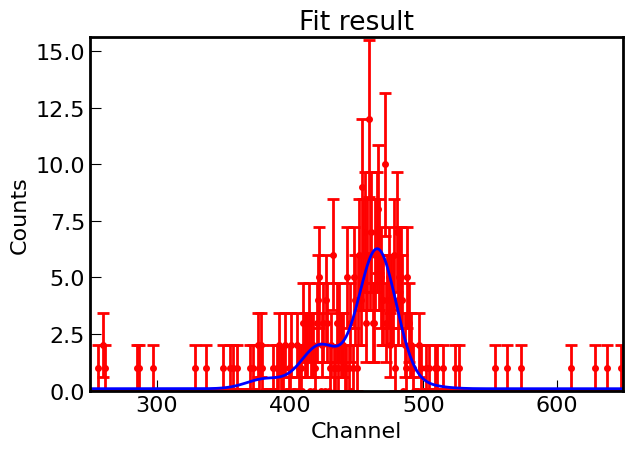

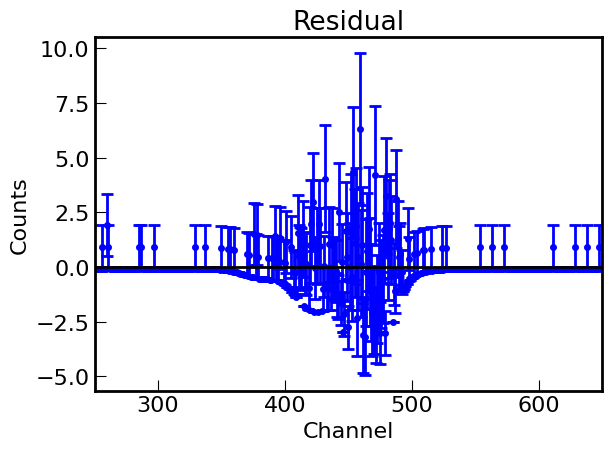

In [49]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

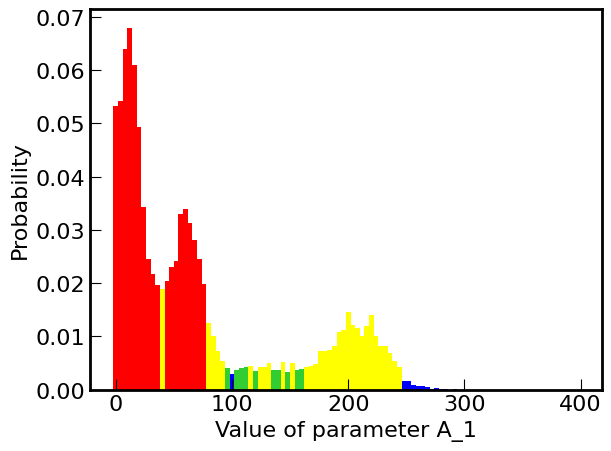

In [50]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1152: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1153: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1154: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1155: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

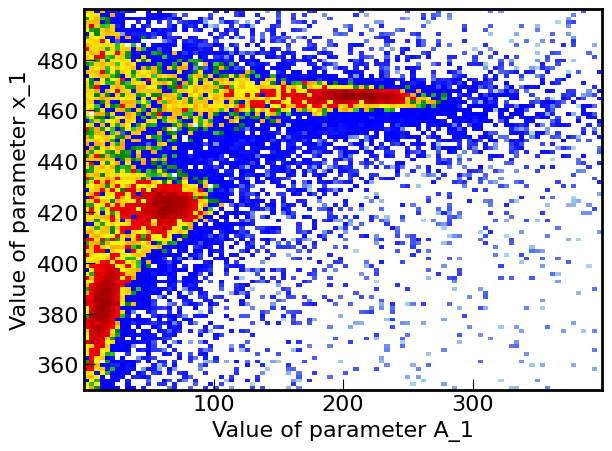

In [51]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 40 out of 36595 samples have logL <= logL_birth,
40 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


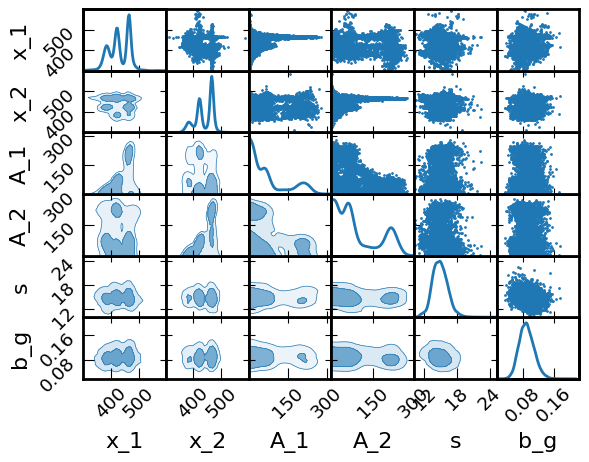

In [52]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [53]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 40 out of 36595 samples have logL <= logL_birth,
40 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


logZ 	 = -326.514989 	± 0.133715
D_KL 	 = 18.797081 	± 0.121978
logL_P 	 = -307.717908 	± 0.063063
d_G 	 = 11.237345 	± 0.275482
